In this dataset, we are going to develop customer segmentation to define marketing strategy by clustering the credit card dataset. The sample Dataset is a summary of the usage behavior of about 9000 active credit card holders in the last 6 months. The file is at a customer level with 18 behavioral variables. 
The following is the summary information of the dataset;

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

So, first we need to download the dataset from Kaggle, import all necessary libraries then read our data. As mentioned earlier, we will be using clustering, an unsupervised machine learning method. Basically, we are going to group same data points based on their relationships by using clustering algorithims k-means. We will train and fit tye model, then make predictions and visualize the results.



In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import shutup; shutup.please()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [148]:
data= pd.read_csv("C:/Users/Admin/Downloads/archive (4).zip")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [149]:
data.shape

(8950, 18)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [151]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [152]:
#check for columns and rows with missing data in the dataset
data[data.isnull().any(axis=1)]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [155]:
X= data.drop(['CUST_ID', 'TENURE'], axis=1)
y=data['TENURE']

In [156]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [157]:
X.shape

(8950, 16)

We are dropping the customer id so that it doesn't affect the scaler. Customer Id consists of strings and numbers by which it becomes difficult to convert. We only have to work with numbers.

In [158]:
X.duplicated().sum()

0

In [159]:
X.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
dtype: int64

In [160]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

The next thing to do is to perform feature scaling and normalization. This will ensure that all features have same range or scale and that is where we use the preprocessing technique from sklearn. We will have to import the scaler.

In [161]:
X. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [162]:
y

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64

In [163]:
X=X.fillna(0)
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


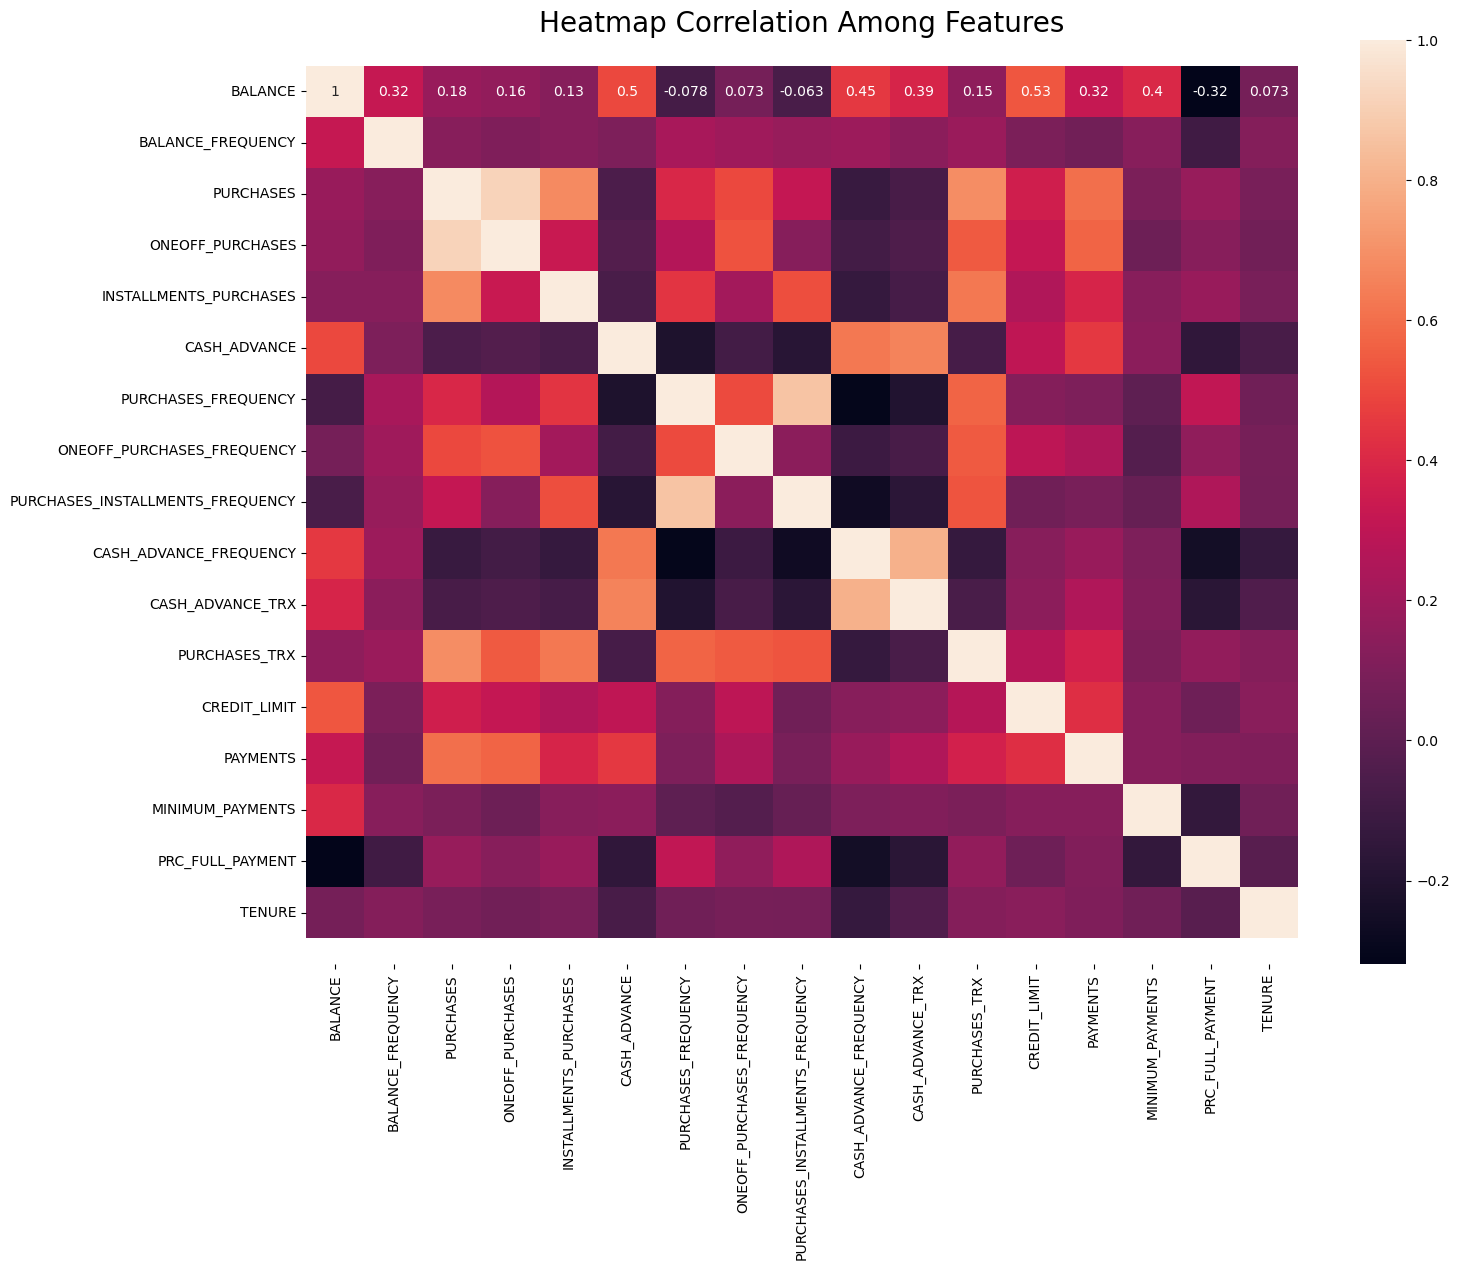

In [164]:
feature = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16,12))
ax = sns.heatmap(data[feature].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation Among Features', size=20)
plt.show()

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
data_scaled= scaler.fit_transform(X)


The next thing we are going to do is customer segmentation. Here we will determine the optimal clusters number using elbow and silhoutte score. We will then use KMeans model. Fit, the model and make predictions. And since we will also visualize our data, we will have to import matplotlib for visualizations. 

#let's determine the optimal number of clusters using elbow method


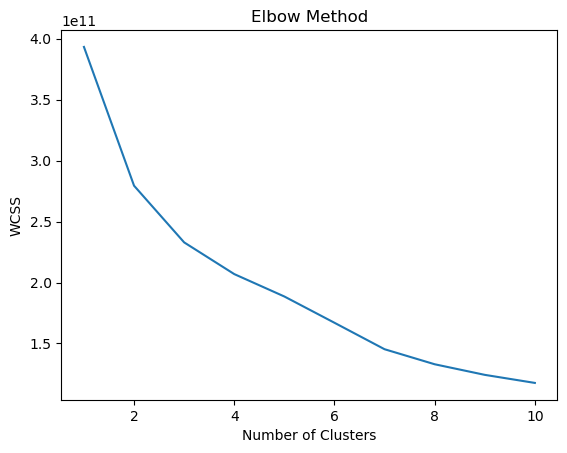

In [166]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="random", random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [167]:
# Apply K-means clustering with the optimal number of clusters (k=4)
k = 4
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(data_scaled)

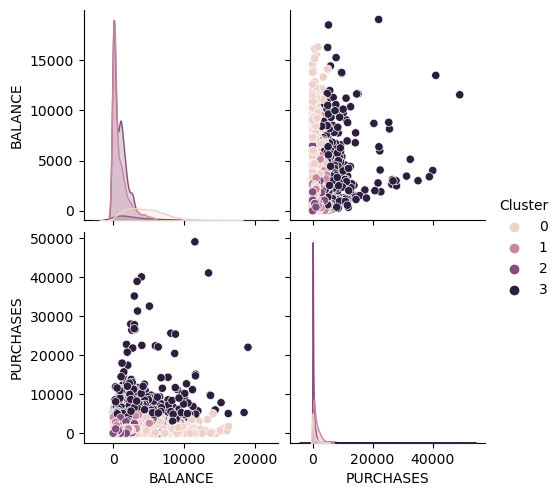

TypeError: agg function failed [how->mean,dtype->object]

In [168]:

# Add the cluster labels to the original dataset
data["Cluster"] = clusters

# Visualize the clusters using a pairplot with two selected features (e.g., BALANCE and PURCHASES)
sns.pairplot(data, vars=["BALANCE", "PURCHASES"], hue="Cluster")
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = data.groupby("Cluster").mean()
print(cluster_summary)


Insights
1. Customers in cluster_0 have high BALANCE but make less purchases
2. Customers in cluster_3 with balance of up to 5000 also seem to make higher purchases

In [169]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 0, ..., 1, 1, 1])

In [170]:
df_copy = data.copy()
df_copy['Cluster'] = clusters
df_copy['Cluster'].value_counts()

Cluster
2    3987
1    3346
0    1216
3     401
Name: count, dtype: int64

Features contributing to each cluster

In [171]:
cluster_0 = df_copy[df_copy['Cluster']==0].drop(['Cluster','CUST_ID'], axis=1).mean()
cluster_1 = df_copy[df_copy['Cluster']==1].drop(['Cluster','CUST_ID'], axis=1).mean()
cluster_2 = df_copy[df_copy['Cluster']==2].drop(['Cluster','CUST_ID'], axis=1).mean()
cluster_3 = df_copy[df_copy['Cluster']==3].drop(['Cluster','CUST_ID'], axis=1).mean()


In [172]:
cluster_0.sort_values(ascending=False)

CREDIT_LIMIT                        7500.127093
BALANCE                             4576.556629
CASH_ADVANCE                        4473.860412
PAYMENTS                            3452.661063
MINIMUM_PAYMENTS                    2037.888883
PURCHASES                            495.553651
ONEOFF_PURCHASES                     315.827730
INSTALLMENTS_PURCHASES               179.809531
CASH_ADVANCE_TRX                      14.171875
TENURE                                11.395559
PURCHASES_TRX                          7.577303
BALANCE_FREQUENCY                      0.968808
CASH_ADVANCE_FREQUENCY                 0.481192
PURCHASES_FREQUENCY                    0.285683
PURCHASES_INSTALLMENTS_FREQUENCY       0.183337
ONEOFF_PURCHASES_FREQUENCY             0.138117
PRC_FULL_PAYMENT                       0.034480
dtype: float64

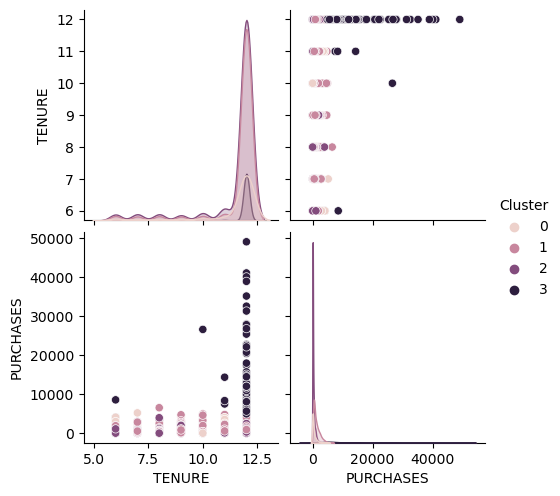

In [173]:
#visualizing clusters using TENURE and PURCHASES
sns.pairplot(data, vars=["TENURE", "PURCHASES"], hue="Cluster")
plt.show()

Insights
1. Cluster_3 customers with TENURE of 12 make averagely purchases of over 10,000
2. CLuster 0,1,2, custommers with all TENURES are making more purchases of less than 10,000

In [174]:
cluster_1.sort_values(ascending=False)

CREDIT_LIMIT                        4218.685072
PAYMENTS                            1337.832133
PURCHASES                           1247.700864
BALANCE                              897.999922
MINIMUM_PAYMENTS                     649.203017
INSTALLMENTS_PURCHASES               648.824809
ONEOFF_PURCHASES                     599.151990
CASH_ADVANCE                         209.972599
PURCHASES_TRX                         22.314405
TENURE                                11.585475
BALANCE_FREQUENCY                      0.935902
PURCHASES_FREQUENCY                    0.887953
CASH_ADVANCE_TRX                       0.792289
PURCHASES_INSTALLMENTS_FREQUENCY       0.715523
ONEOFF_PURCHASES_FREQUENCY             0.298462
PRC_FULL_PAYMENT                       0.270210
CASH_ADVANCE_FREQUENCY                 0.042841
dtype: float64

Customers in this cluster is identified by an active use of their credit card for buying stuffs as indicated by a high score in PURCHASES_FREQUENCY (0.87). In this case, they pay mostly in installments as indicated by a high score in PURCHASES_INSTALLMENTS_FREQUENCY (0.82).

In [175]:
cluster_2.sort_values(ascending=False)

CREDIT_LIMIT                        3279.968222
BALANCE                             1002.247105
PAYMENTS                             971.468145
CASH_ADVANCE                         587.536111
MINIMUM_PAYMENTS                     554.686753
PURCHASES                            272.319827
ONEOFF_PURCHASES                     210.909885
INSTALLMENTS_PURCHASES                61.676228
TENURE                                11.453725
PURCHASES_TRX                          2.959368
CASH_ADVANCE_TRX                       2.087785
BALANCE_FREQUENCY                      0.789104
PURCHASES_FREQUENCY                    0.173310
CASH_ADVANCE_FREQUENCY                 0.113408
ONEOFF_PURCHASES_FREQUENCY             0.087295
PURCHASES_INSTALLMENTS_FREQUENCY       0.082640
PRC_FULL_PAYMENT                       0.078704
dtype: float64

In [176]:
cluster_3.sort_values(ascending=False)

CREDIT_LIMIT                        9753.117207
PURCHASES                           7769.435860
PAYMENTS                            7390.453399
ONEOFF_PURCHASES                    5168.597706
BALANCE                             3581.770333
INSTALLMENTS_PURCHASES              2602.334414
MINIMUM_PAYMENTS                    2004.826559
CASH_ADVANCE                         687.300265
PURCHASES_TRX                         89.715711
TENURE                                11.950125
CASH_ADVANCE_TRX                       2.167082
BALANCE_FREQUENCY                      0.987070
PURCHASES_FREQUENCY                    0.945557
PURCHASES_INSTALLMENTS_FREQUENCY       0.785910
ONEOFF_PURCHASES_FREQUENCY             0.741514
PRC_FULL_PAYMENT                       0.289033
CASH_ADVANCE_FREQUENCY                 0.072089
dtype: float64

CUSTOMER SEGMENTATION


Cluster_0

1. Customers in this cluster are identified by their frequent use of using credit card to make purchases. This is evidenced from their high CREDIT_LIMIT. Also, most of their purchases are from CASH_ADVANCES.However, even with that, they have a low purchase frequency from evidenced from their PURCHASE_FREQUENCY of 0.28



Cluster_1
1. In this category customers have an average credit limit but with high PURCHASE_FREQUENCY at 0.88. Also, most of their purchases is in installments evidenced by their PURCHASES_INSTALLMENT_FREQUENCY at 0.77. However, customers in this category have a very low ONEOFF_PURCHASE FREQUENCY.

Cluster_2
1. Customers in this cluster have the lowest credit limit of 3279.97. Though they make payments through their credit limit, they also make payments through CASH_ADVANCE and BALANCES. Though they have a low PURCHASES_FREQUENCY at 0.17, they do have the highest ONEOFF_PURCHASES_FREQUECNCY at 210.9. 


Cluster_3
1. This category has the highest credit limit. Also, they make the hioghest purchases evidenced by their PURCHASE_FREQUENCY of 0.945557. Also their ONEOFF_PURCHASE_FREQUENCY IS HIGH AT 0.74.

BUSINESS RECOMMENDATION

 Cluster 0
 1. I will suggest customers in this category to be properly motivated so that they can continue using their credit card and increase their CREDIT_LIMIT. Since most of their purchases are from CASH_ADVANCES, they should be given discounts this will help motivate them on making more purchases using their credit cards. This will also boost their PURCHASE_FREQUENCY which seems to be low.

Cluster_1

2. Customers in this category have a higher PURCHASE_INSTALLMENT_FREQUENCY, so, I will suggest the bank to increase their credit card limit which will encourage them to make even more purchases. Also, since they are also good at PAYMENTS, they should be motivated even with minimal interests to encourage them to keep good payments. 

Cluster 2

3. Customers in this category should be considered for more CASH_ADVANCE services with lower interset. For instance, if they are considered for cash_advance through phones, this will motivate them to use their card more often. This way, their PURCHASES_FREQUENCY will also increase which will be good for business.

Cluster 3

4. Customers in this cluster need to be more motivated to continue making purchaes. This way, their CREDIT_LIMIT will increase as they will even become more active. For instance they can be given discounts for orders above 7000. 
